In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
crop= pd.read_csv("/Agri_Data.csv")

In [4]:
crop.head()

,District_Name,Season,Crop,N kg/ha,P kg/ha,K kg/ha,ph,Humidity_Min,Humidity_Max,Humidity_around,Rainfall,Temp_around,Area,Production
0,ADILABAD,Kharif,Arhar/Tur,25.399955,44.023330,47.866532,7.109764,29.1,41.2,35.15,798.6,36.388150,32200,1100.0
1,ADILABAD,Kharif,Arhar/Tur,25.942129,43.686642,46.978921,7.419597,21.1,40.3,30.70,1104.0,38.384425,35900,12700.0
2,ADILABAD,Rabi,Arhar/Tur,25.481752,44.183059,47.628207,6.686975,25.4,49.4,37.40,985.8,39.089421,100,100.0
3,ADILABAD,Kharif,Arhar/Tur,29.236268,43.543630,48.151850,7.505164,15.8,47.2,31.50,816.0,38.594861,38996,9437.0
4,ADILABAD,Rabi,Arhar/Tur,27.062090,44.683242,48.497706,7.435820,26.1,61.1,43.60,967.0,40.990483,767,186.0


In [ ]:
crop.shape

(4920, 14)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District_Name    4920 non-null   object 
 1   Season           4920 non-null   object 
 2   Crop             4920 non-null   object 
 3   N kg/ha          4920 non-null   float64
 4   P  kg/ha         4920 non-null   float64
 5   K  kg/ha         4920 non-null   float64
 6   ph               4920 non-null   float64
 7   Humidity_Min     4920 non-null   float64
 8   Humidity_Max     4920 non-null   float64
 9   Humidity_around  4920 non-null   float64
 10  Rainfall         4918 non-null   float64
 11  Temp_around      4920 non-null   float64
 12  Area             4920 non-null   int64  
 13  Production       4886 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 538.2+ KB


In [ ]:
crop.describe()

,N kg/ha,P kg/ha,K kg/ha,ph,Humidity_Min,Humidity_Max,Humidity_around,Rainfall,Temp_around,Area,Production
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4918.000000,4920.000000,4920.000000,4.886000e+03
mean,54.506052,37.813303,32.664444,6.330003,40.726707,79.454837,60.090772,760.007727,26.489978,16159.752033,4.623833e+04
std,42.320716,20.226669,18.111641,0.905339,21.873025,17.441835,18.212296,307.160590,5.052983,35298.089894,1.639679e+05
min,5.542082,10.038336,11.511405,3.030397,4.400000,16.300000,11.350000,138.400000,1.064824,1.000000,0.000000e+00
25%,20.094323,24.616994,18.965595,5.957443,22.700000,67.700000,45.687500,493.400000,22.845014,300.000000,2.420000e+02
50%,40.058075,32.263822,29.146830,6.437534,36.450000,82.700000,59.600000,751.400000,26.459445,2000.000000,2.396000e+03
75%,85.113829,45.355416,44.873965,6.963438,57.000000,95.500000,74.850000,983.000000,29.399688,13985.000000,1.898750e+04
max,150.999378,150.989782,80.990777,8.098821,99.400000,100.000000,99.700000,1628.600000,40.990483,361169.000000,2.645000e+06


In [ ]:
sns.pairplot(crop)

In [ ]:
duplicate=crop.duplicated()
print(duplicate.sum())

0


In [6]:
crop.isnull().sum()

District_Name       0
Season              0
Crop                0
N kg/ha             0
P  kg/ha            0
K  kg/ha            0
ph                  0
Humidity_Min        0
Humidity_Max        0
Humidity_around     0
Rainfall            2
Temp_around         0
Area                0
Production         34
dtype: int64

In [7]:
crop.dropna(how='any', inplace=True)
crop.shape

(4884, 14)

In [8]:
crop.columns

Index(['District_Name', 'Season', 'Crop', 'N kg/ha', 'P  kg/ha', 'K  kg/ha',
       'ph', 'Humidity_Min', 'Humidity_Max', 'Humidity_around', 'Rainfall',
       'Temp_around', 'Area', 'Production'],
      dtype='object')

In [9]:
crop['Crop'].unique()

array(['Arhar/Tur', 'Bajra', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Bottle Gourd', 'Brinjal', 'Cabbage', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Cowpea(Lobia)', 'Cucumber', 'Dry chillies',
       'Dry ginger', 'Garlic', 'Ginger', 'Groundnut', 'Horse-gram',
       'Jowar', 'Korra', 'Linseed', 'Maize', 'Masoor', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Peas  (vegetable)',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Samai', 'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower',
       'Sweet potato', 'Tobacco', 'Tomato', 'Turmeric', 'Urad', 'Wheat'],
      dtype=object)

In [ ]:
crop['Crop'].nunique()

44

In [ ]:
crop['Crop'].value_counts()

Rice                         312
Maize                        306
Jowar                        298
Groundnut                    295
Dry chillies                 290
Moong(Green Gram)            260
Urad                         249
Sesamum                      248
Arhar/Tur                    216
Onion                        203
Horse-gram                   192
Bajra                        183
Sunflower                    177
Castor seed                  156
Cotton(lint)                 153
Sugarcane                    128
Tobacco                      122
Turmeric                     113
Ragi                         110
Wheat                        107
Coriander                    105
Safflower                     86
Soyabean                      67
Sweet potato                  51
Dry ginger                    46
Cowpea(Lobia)                 44
Rapeseed &Mustard             39
Linseed                       38
Mesta                         37
Potato                        34
Cucumber  

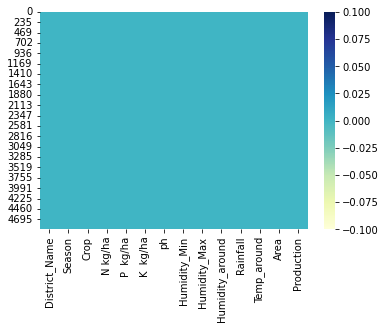

In [ ]:
sns.heatmap(crop.isnull(),cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


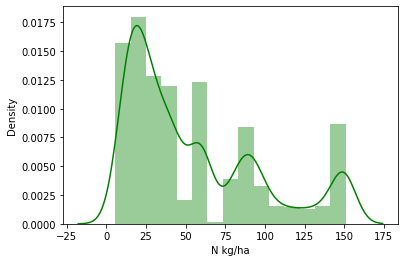

In [ ]:
sns.distplot(crop['N kg/ha'],color="green",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


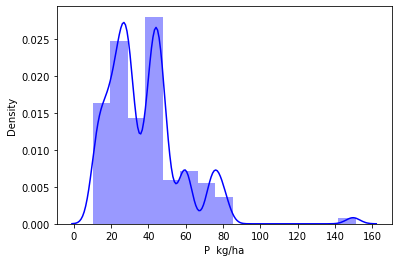

In [ ]:
sns.distplot(crop['P  kg/ha'],color="blue",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


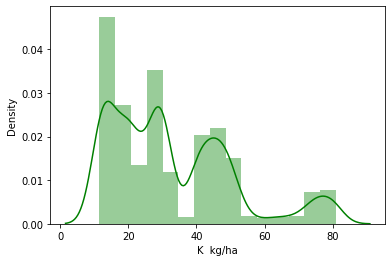

In [ ]:
sns.distplot(crop['K  kg/ha'],color="green",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


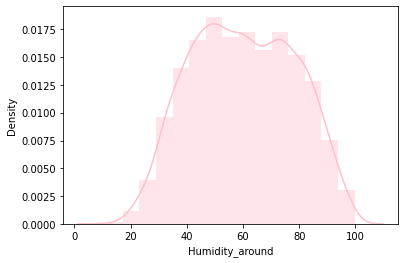

In [ ]:
sns.distplot(crop['Humidity_around'],color="pink",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


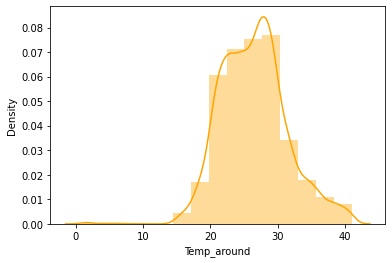

In [ ]:
sns.distplot(crop['Temp_around'],color="orange",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


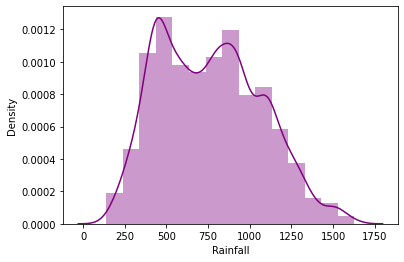

In [ ]:
sns.distplot(crop['Rainfall'],color="purple",bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


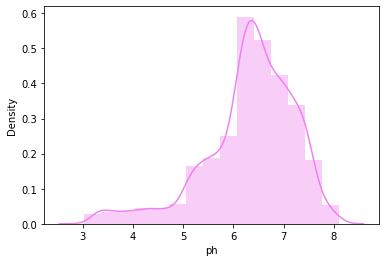

In [ ]:
sns.distplot(crop['ph'],color="violet",bins=15)

In [ ]:
crop.corr()

,N kg/ha,P kg/ha,K kg/ha,ph,Humidity_Min,Humidity_Max,Humidity_around,Rainfall,Temp_around,Area,Production
N kg/ha,1.000000,0.684364,0.840147,-0.014370,-0.003666,-0.014143,-0.008977,0.000006,-0.147050,0.258444,0.335859
P kg/ha,0.684364,1.000000,0.760726,-0.178932,-0.009559,-0.015421,-0.013127,-0.001210,-0.102961,0.047440,0.180181
K kg/ha,0.840147,0.760726,1.000000,-0.068420,-0.005708,-0.015311,-0.010762,-0.002678,0.014919,0.241001,0.338031
ph,-0.014370,-0.178932,-0.068420,1.000000,0.007224,-0.003031,0.002885,-0.016136,0.268552,-0.022546,0.002468
Humidity_Min,-0.003666,-0.009559,-0.005708,0.007224,1.000000,0.712975,0.941885,-0.056688,0.021959,0.018880,-0.000870
Humidity_Max,-0.014143,-0.015421,-0.015311,-0.003031,0.712975,1.000000,0.907095,-0.060130,0.019240,-0.006545,-0.012601
Humidity_around,-0.008977,-0.013127,-0.010762,0.002885,0.941885,0.907095,1.000000,-0.062838,0.022400,0.008198,-0.006559
Rainfall,0.000006,-0.001210,-0.002678,-0.016136,-0.056688,-0.060130,-0.062838,1.000000,-0.003988,0.005860,0.000417
Temp_around,-0.147050,-0.102961,0.014919,0.268552,0.021959,0.019240,0.022400,-0.003988,1.000000,0.063103,-0.039831
Area,0.258444,0.047440,0.241001,-0.022546,0.018880,-0.006545,0.008198,0.005860,0.063103,1.000000,0.498265


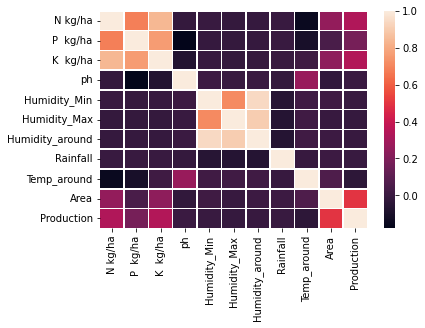

In [ ]:
sns.heatmap(crop.corr(), cbar=True, linewidths=0.5)

Bivariate analysis

In [ ]:
crop.columns

Index(['District_Name', 'Season', 'Crop', 'N kg/ha', 'P  kg/ha', 'K  kg/ha',
       'ph', 'Humidity_Min', 'Humidity_Max', 'Humidity_around', 'Rainfall',
       'Temp_around', 'Area', 'Production'],
      dtype='object')

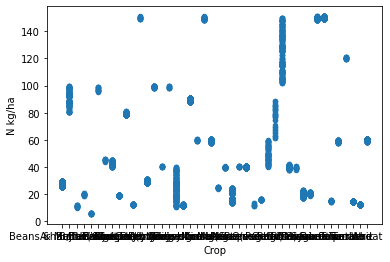

In [ ]:
# Scatter plot
crop.plot(x='Crop', y='N kg/ha', kind='scatter')
plt.show()

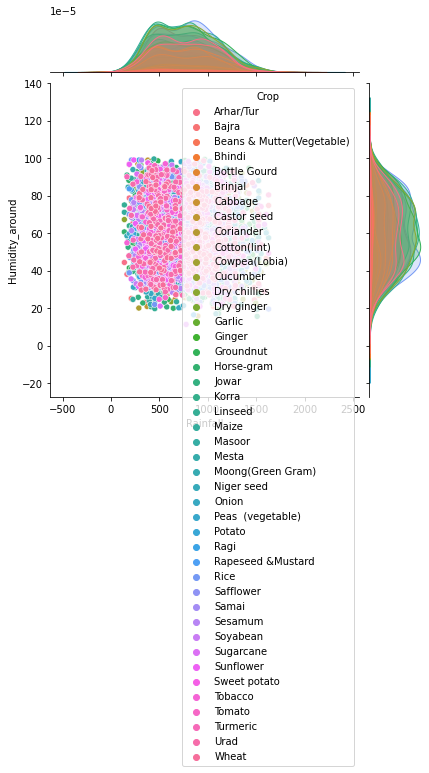

In [10]:
sns.jointplot(x="Rainfall", y="Humidity_around",hue="Crop", data=crop)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

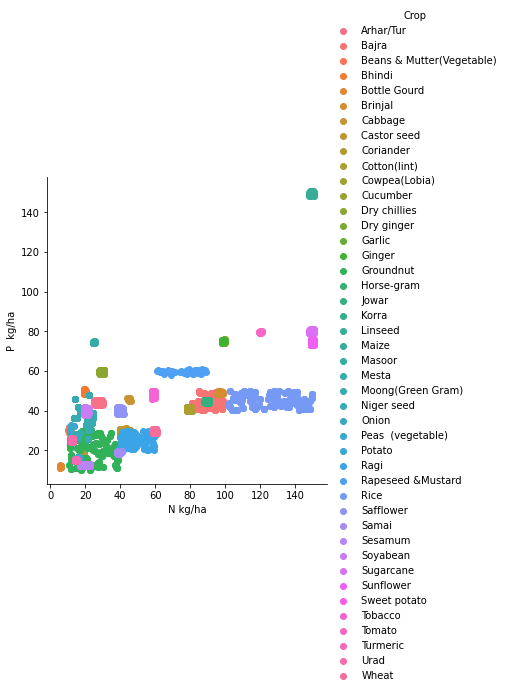

In [13]:
sns.FacetGrid(crop,hue="Crop",size=5).map(plt.scatter,"N kg/ha","P  kg/ha").add_legend()(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

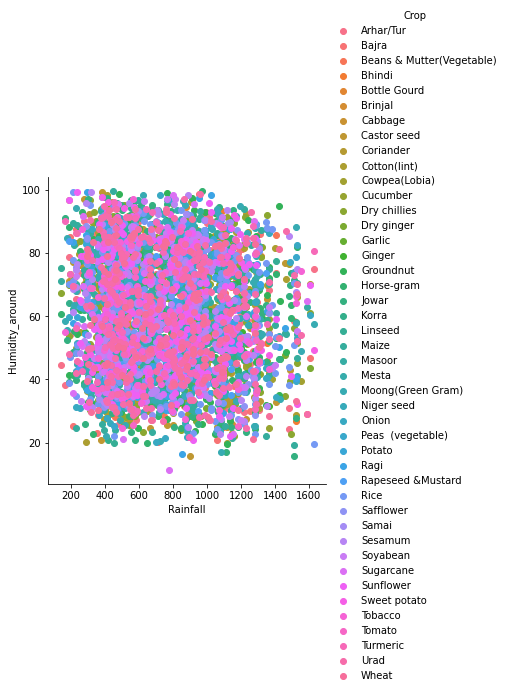

In [17]:
sns.FacetGrid(crop,hue="Crop",size=5).map(plt.scatter,"Rainfall","Humidity_around").add_legend()(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

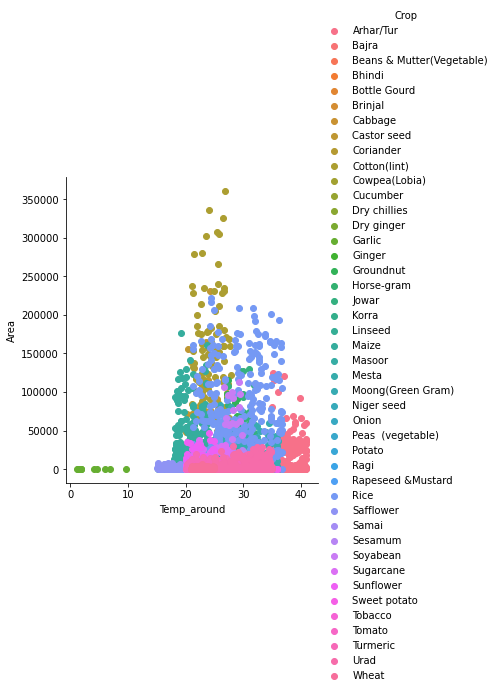

In [18]:
sns.FacetGrid(crop,hue="Crop",size=5).map(plt.scatter,"Temp_around","Area").add_legend()(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

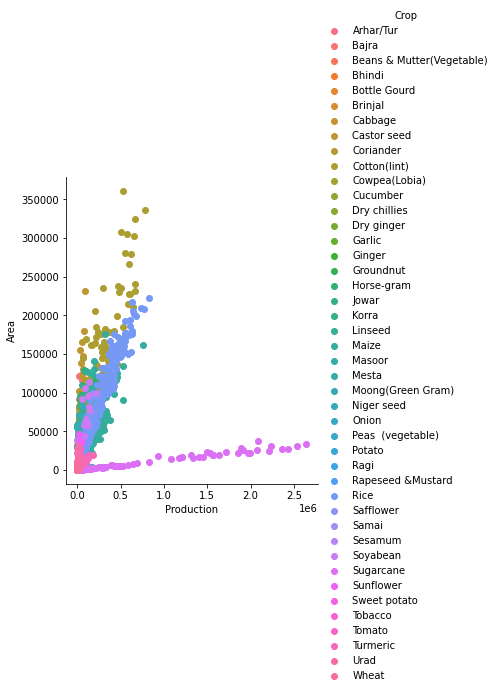

In [20]:
sns.FacetGrid(crop,hue="Crop",size=5).map(plt.scatter,"Production","Area").add_legend()(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig=plt.figure(figsize=(15,20))
sns.boxplot(data=crop)
plt.show()

In [ ]:
fig=plt.figure(figsize=(8,10))
sns.boxplot(data=crop['Production'])

In [ ]:
fig=plt.figure(figsize=(8,10))
sns.boxplot(crop['N kg/ha'])

In [ ]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder()

In [ ]:
crop["Crop"]= label_encoder.fit_transform(crop["Crop"]) 
crop["Season"]= label_encoder.fit_transform(crop["Season"]) 

In [ ]:
crop

In [ ]:
features = crop[['N kg/ha', 'P  kg/ha','K  kg/ha','Temp_around', 'Humidity_around', 'ph', 'Rainfall']]
target = crop['Crop']

In [ ]:
features

In [ ]:
target

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =2)

In [ ]:
print (x_train)

In [ ]:
print (x_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
predicted_values = knn.predict(x_test)

In [ ]:
acc=[]
model=[]

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Normalizing The data
std_scale=StandardScaler()
std_scale
StandardScaler(copy=True,with_mean=True,with_std=True)
crop['Rainfall']=std_scale.fit_transform(crop[['Rainfall']])
crop['Temp_around']=std_scale.fit_transform(crop[['Temp_around']])
crop['Humidity_around']=std_scale.fit_transform(crop[['Humidity_around']])
crop['N kg/ha']=std_scale.fit_transform(crop[['N kg/ha']])
crop['P  kg/ha']=std_scale.fit_transform(crop[['P  kg/ha']])
crop['K  kg/ha']=std_scale.fit_transform(crop[['K  kg/ha']])
crop['ph']=std_scale.fit_transform(crop[['ph']])

In [ ]:
crop

In [ ]:
features_1 = crop[['N kg/ha', 'P  kg/ha','K  kg/ha','Temp_around', 'Humidity_around', 'ph', 'Rainfall']]
target_1 = crop['Crop']

In [ ]:
features_1

In [ ]:
target_1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_1,target_1,test_size = 0.3,random_state =2)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
acc_1=[]
model_1=[]

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)
acc_1.append(x)
model_1.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)